# Iris Flower Classification

## Import Data :

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
column_names = ["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"]

In [3]:
#Importing dataset
dataset = pd.read_csv("F:\GitRepo\Iris-Flowers-Classification\iris.csv", header = None,names = column_names)

## Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

In [4]:
dataset.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


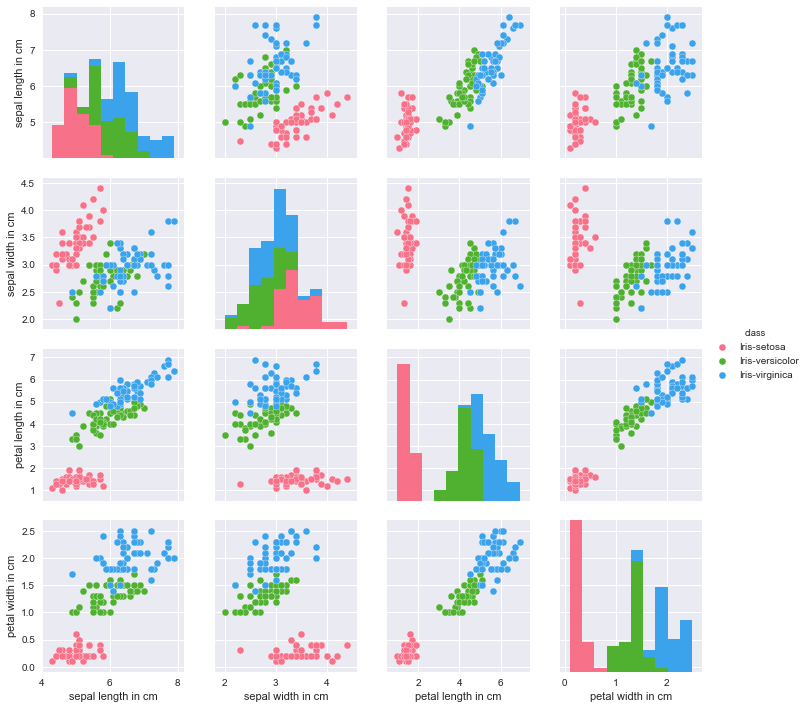

In [6]:
sns.pairplot(dataset,hue = "class",palette = "husl")

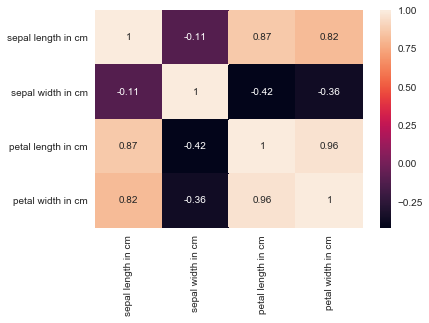

In [7]:
sns.heatmap(dataset.corr(),annot=True)

Correlation between petal length and width is very high (0.96). We can use petal length and width as features for classification.

In [8]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(dataset[["petal length in cm","petal width in cm"]],dataset["class"],test_size=0.2)

In [10]:
X_train.shape

(120, 2)

In [11]:
X_test.shape

(30, 2)

In [12]:
classifier = svm.SVC()
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
predictions = classifier.predict(X_test)

In [14]:
cm = metrics.confusion_matrix(y_test,predictions)

In [15]:
cm

array([[ 6,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]], dtype=int64)

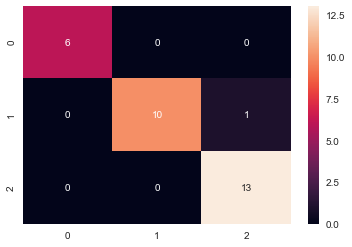

In [16]:
sns.heatmap(cm,annot=True)

In [17]:
print('The accuracy of the SVM is: {}%'.format(metrics.accuracy_score(predictions,y_test)*100))

The accuracy of the SVM is: 96.66666666666667%
